<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/main/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## **Todo o dataset**

In [ ]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


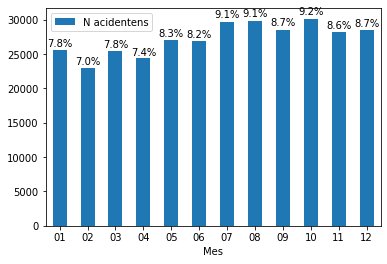

In [152]:
percentages=[]

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(data)) 
    ax.annotate(f'{round(height/len(data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')


In [155]:
new_data= pd.DataFrame(columns = data.columns)
datas=[]

for name, group in mes_groupby:
  d=group.sample(int(round(10000*percentages[int(name)-1]))) 
  new_data.append(d, ignore_index = True)
  datas.append(d)


new_data=datas[0]

for i in range(1,12):
 new_data=pd.concat([new_data,datas[i]], ignore_index = True)

In [156]:
new_data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,20191683757,2019:01:10 16:00:00,01/10/00,01/01/00,01/01/00,Guarda Nacional Republicana,90.0,90.0,Quinta-Feira,"41,091920",...,Inexistentes,No sentido crescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
1,20161023111,2016:01:28 08:20:00,01/28/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Quinta-Feira,"38,800978",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita
2,2010427486,2010:01:08 14:30:00,01/08/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sexta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda
3,20191680865,2019:01:17 13:20:00,01/17/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Quinta-Feira,"40,960900",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
4,20181365406,2018:01:06 18:30:00,01/06/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,"40,569908",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Esquerda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2011502943,2010:12:26 15:00:00,01/26/00,12/01/00,01/01/00,Polícia de Segurança Pública,80.0,100.0,Domingo,"0,00",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda
9996,20181627052,2018:12:12 16:00:00,01/12/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Quarta-Feira,38.7496241,...,Inexistentes,NÃO DEFINIDO,Cedência de passagem,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
9997,2012651474,2012:12:06 08:00:00,01/06/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Quinta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9998,20171336041,2017:12:19 12:45:00,01/19/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Terça-Feira,"38,743429",...,Inexistentes,No sentido decrescente da quilometragem,NÃO DEFINIDO,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda


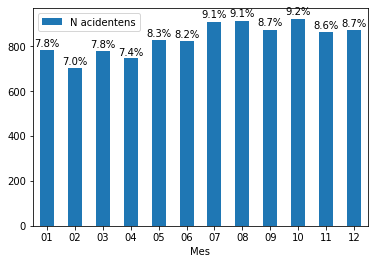

In [157]:
percentages=[]

mes_groupby=new_data.groupby(new_data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(new_data)) 
    ax.annotate(f'{round(height/len(new_data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')

In [ ]:
ano_groupby=data.groupby(data['Datahora'].str.split(':').str[0])
df = pd.DataFrame({'Ano':ano_groupby.groups.keys(), 'N acidentens':ano_groupby.size()})
ax = df.plot.bar(x='Ano', y='N acidentens', rot=0)

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Dia da Semana'].str.split('-').str[0])
df = pd.DataFrame({'Dias de Semana':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.bar(x='Dias de Semana', y='N acidentens', rot=0)


### **Começa  aqui os 10000** 

In [ ]:
# data = data.sample(n=10000)
# data.to_csv('acidentes.csv', index=False)


In [ ]:
data=pd.read_csv('acidentes.csv', sep = ',')

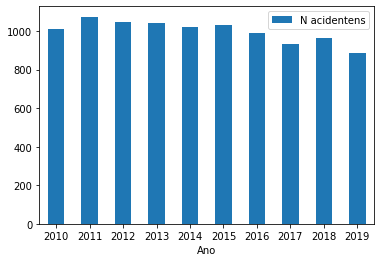

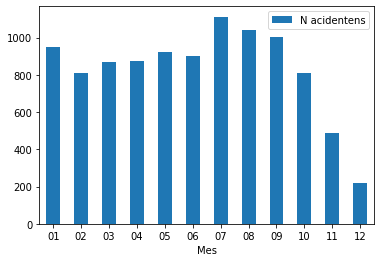

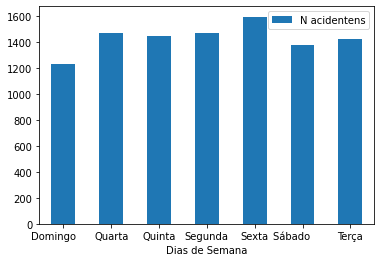

In [ ]:
ano_groupby=data.groupby(data['Datahora'].str.split(':').str[0])
df = pd.DataFrame({'Ano':ano_groupby.groups.keys(), 'N acidentens':ano_groupby.size()})
ax = df.plot.bar(x='Ano', y='N acidentens', rot=0)

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Dia da Semana'].str.split('-').str[0])
df = pd.DataFrame({'Dias de Semana':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.bar(x='Dias de Semana', y='N acidentens', rot=0)

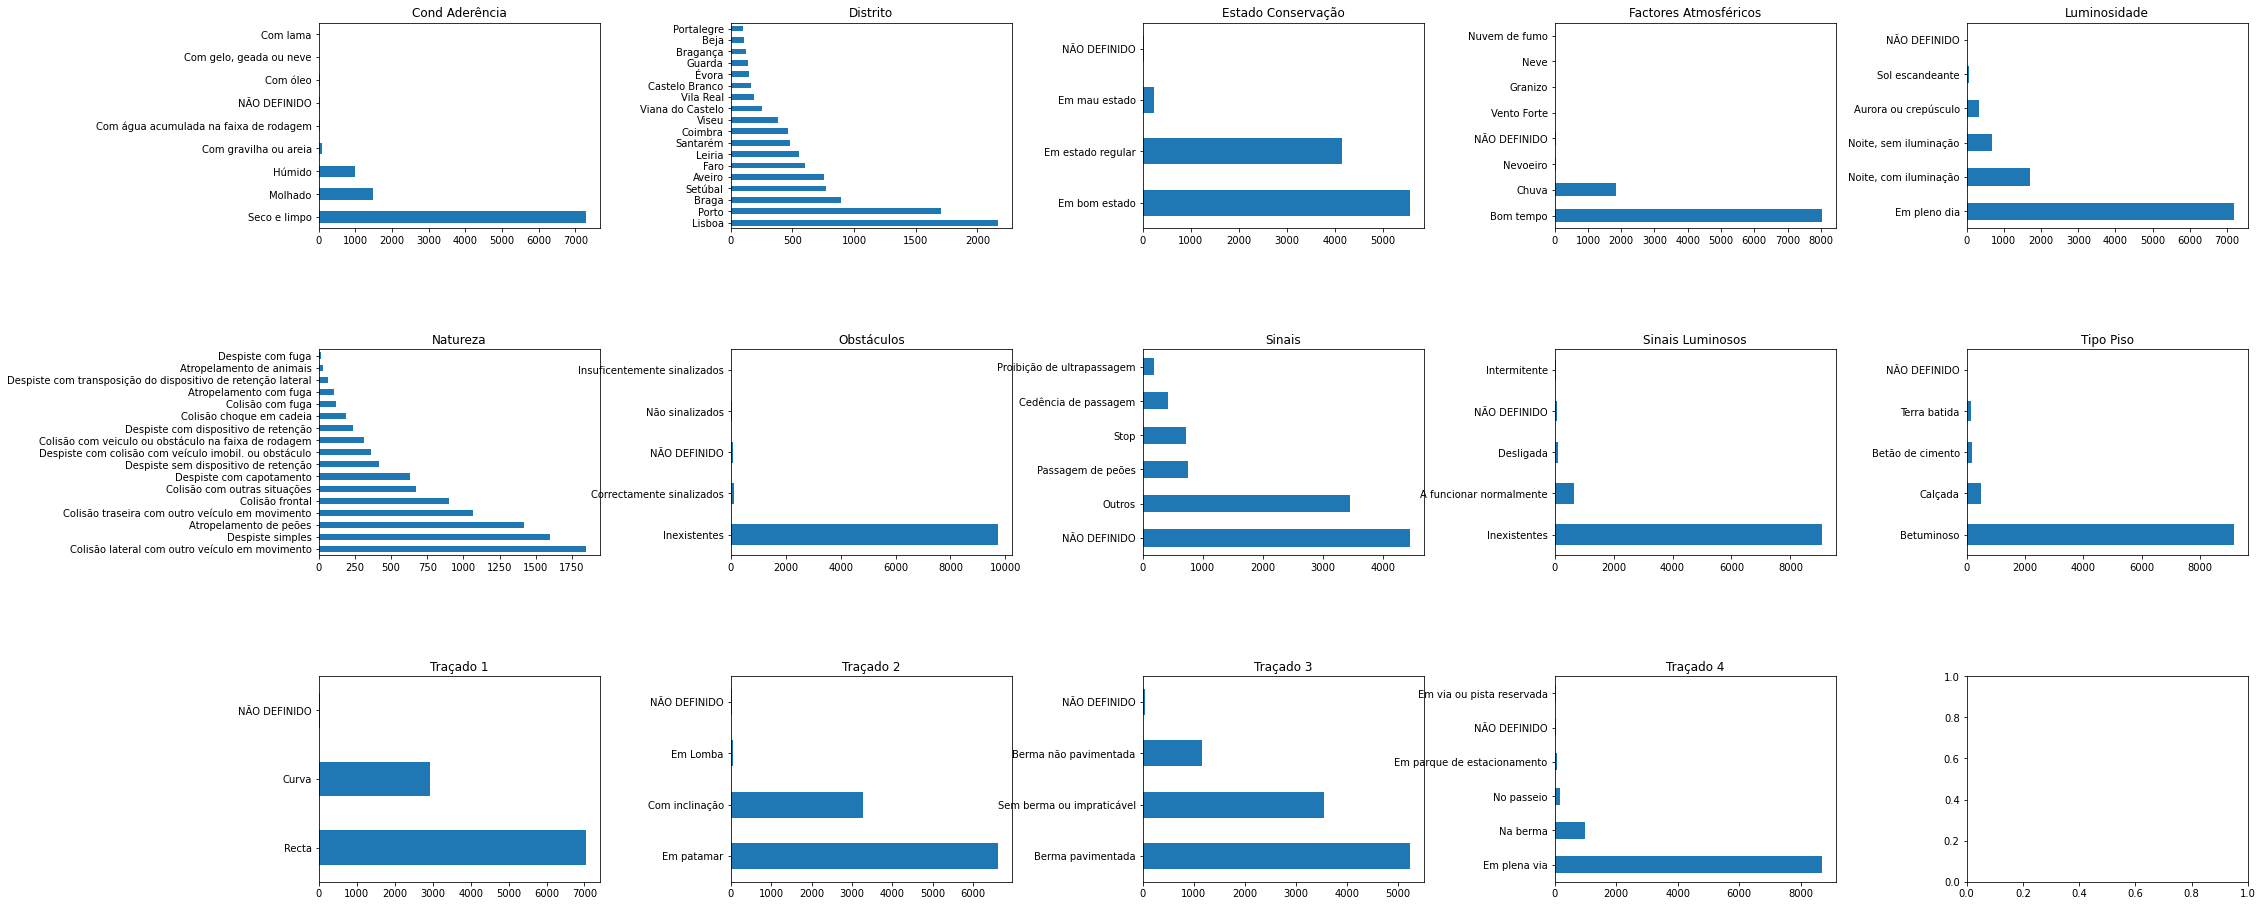

In [ ]:
services = ['Cond Aderência','Distrito','Estado Conservação','Factores Atmosféricos',
            'Luminosidade','Natureza','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Traçado 3','Traçado 4']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = data[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = data[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = data[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

In [ ]:
data_graves= data[(data['Num. Feridos ligeiros a 30 dias']>0) &(data['Num. Feridos graves a 30 dias']>0) & (data['Num. Mortos a 30 dias']>0)]

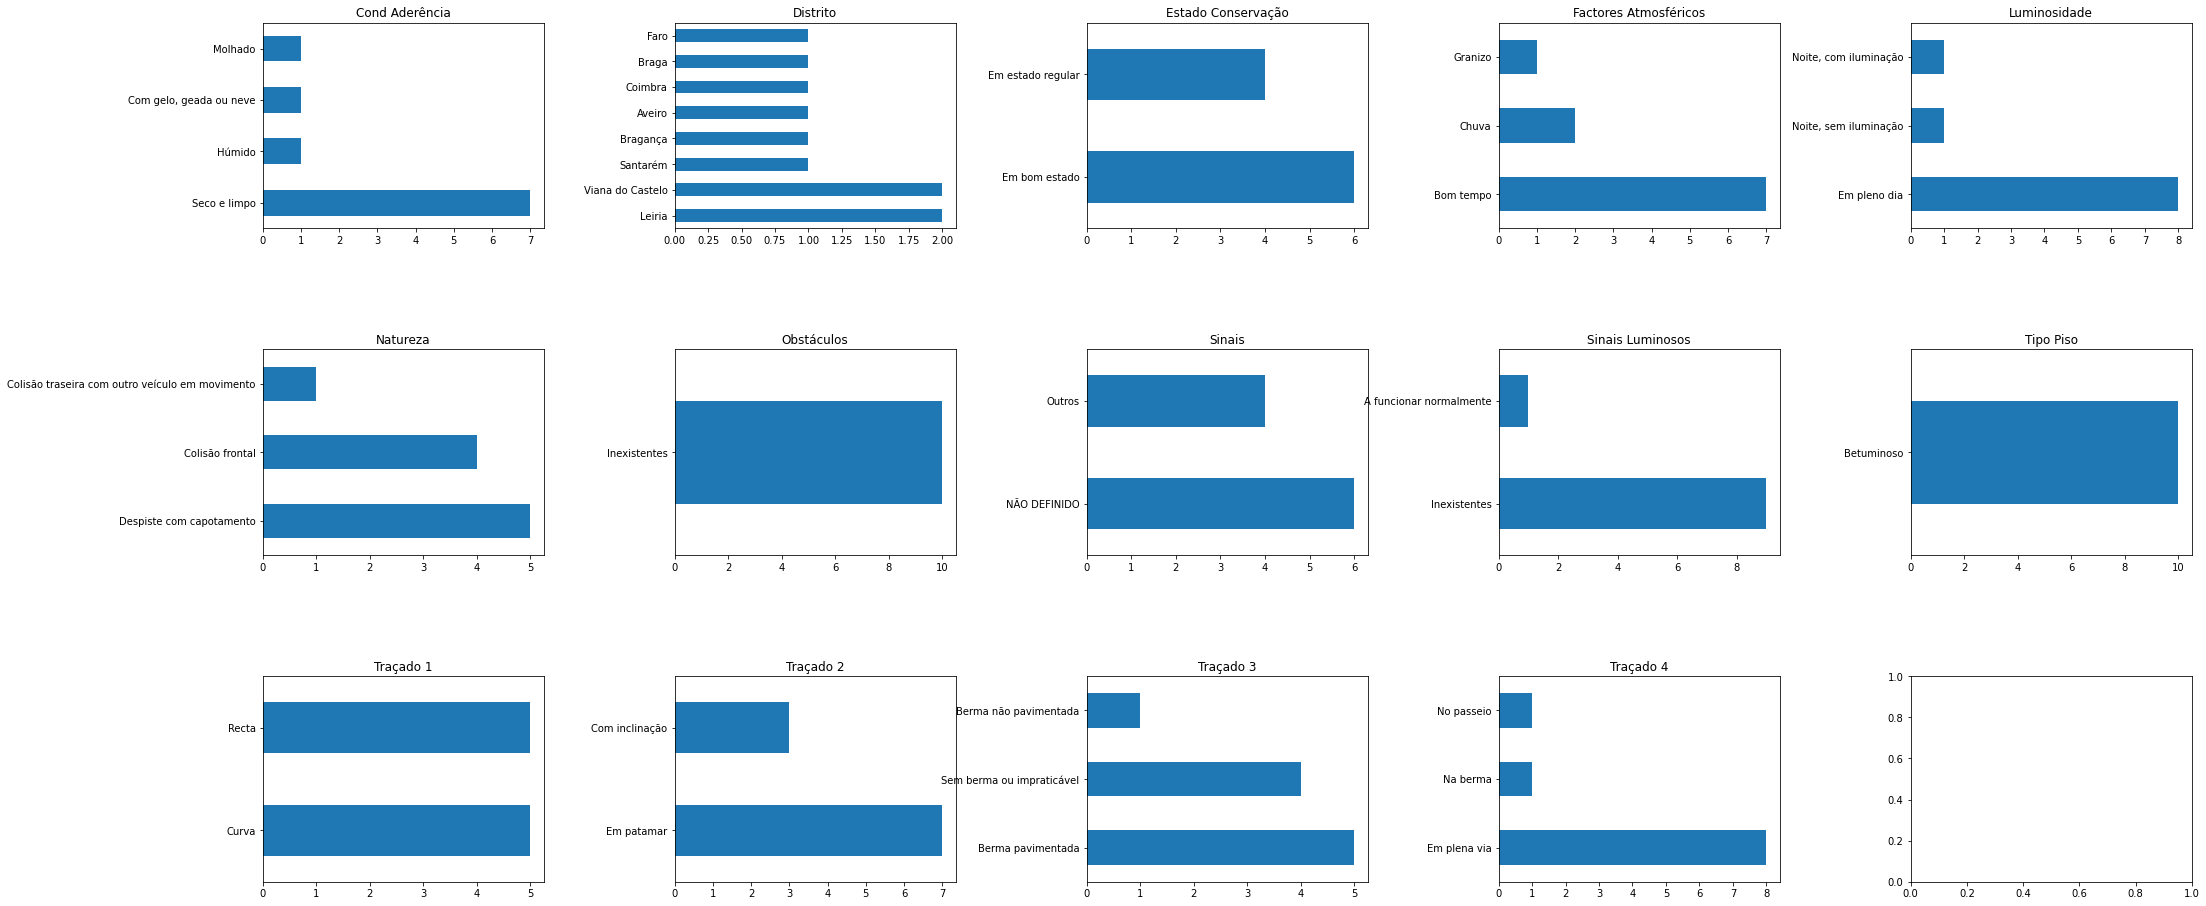

In [ ]:
services = ['Cond Aderência','Distrito','Estado Conservação','Factores Atmosféricos',
            'Luminosidade','Natureza','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Traçado 3','Traçado 4']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

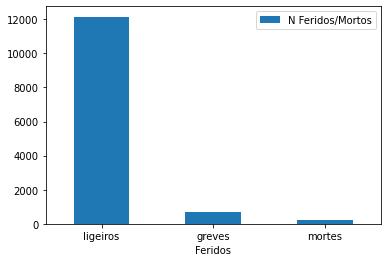

In [ ]:
feridos=['ligeiros', 'greves','mortes']
n_feridos=[]
n_feridos.append(data['Num. Feridos ligeiros a 30 dias'].sum())
n_feridos.append(data['Num. Feridos graves a 30 dias'].sum())
n_feridos.append(data['Num. Mortos a 30 dias'].sum())

df = pd.DataFrame({'Feridos':feridos, 'N Feridos/Mortos':n_feridos})
ax = df.plot.bar(x='Feridos', y='N Feridos/Mortos', rot=0)

In [ ]:
data=data.drop(['Id. Acidente','Hora','Mês','Entidades Fiscalizadoras','Latitude GPS','Longitude GPS','Pov. Proxima','Nome arruamento','Cod Via'], axis=1)

In [ ]:
data['Datahora']=data['Datahora'].str.split(' ').str[-1]

In [ ]:
data=data.rename(columns={"Datahora": "Hora"})

In [ ]:
data

,Hora,Dia,Velocidade local,Velocidade geral,Dia da Semana,Num. Mortos a 30 dias,Num. Feridos graves a 30 dias,Num. Feridos ligeiros a 30 dias,Características Tecnicas1,Cond Aderência,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
6652,14:15:00,01/17/00,50.0,50.0,Quarta-Feira,0,0,1,Estrada sem separador,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Na berma,Direita
7304,11:15:00,01/24/00,60.0,60.0,Quarta-Feira,0,0,1,Auto-estrada,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda
27336,12:45:00,01/14/00,50.0,50.0,Quinta-Feira,0,0,1,Estrada sem separador,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Cedência de passagem,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Direita
21705,11:50:00,01/22/00,40.0,90.0,Segunda-Feira,0,0,1,Outra via,Molhado,...,Inexistentes,No sentido decrescente da quilometragem,Outros,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita
19888,20:00:00,01/07/00,100.0,120.0,Sábado,0,0,2,Auto-estrada,Seco e limpo,...,Inexistentes,No sentido crescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,20:40:00,01/24/00,50.0,50.0,Sexta-Feira,0,0,3,Estrada sem separador,Molhado,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Em patamar,Berma não pavimentada,Em plena via,Direita
22527,18:00:00,01/11/00,50.0,50.0,Domingo,0,0,1,Estrada sem separador,Húmido,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
24678,18:40:00,01/31/00,50.0,50.0,Quarta-Feira,0,0,2,Outra via,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betão de cimento,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Direita
21574,10:45:00,01/28/00,40.0,120.0,Terça-Feira,0,0,1,Auto-estrada,Seco e limpo,...,Inexistentes,No sentido decrescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda


In [ ]:
hours=['06:00:00','12:00:00','18:00:00']
d=pd.to_datetime(hours)

# mornin=data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]
# print(mornin)
feridos=[]
for ind in data.index:
  print(data['Hora'][ind])
  if data['Hora'][ind]<hours[0]:
    feridos.append('Madrugada')
  elif (data['Hora'][ind]>=hours[0]) & (data['Hora'][ind]<hours[1]):
    feridos.append('Manha')
  elif  (data['Hora'][ind]>=hours[1]) & (data['Hora'][ind]<hours[2]):
    feridos.append('Tarde')
  else:
    feridos.append('Noite')

print(feridos)

# conditions = [
#     (data[data['Hora'] <hours[0]]),
#     (data[(data['Hora']>=hours[0]) & (data['Hora']<hours[1])]),
#     ( data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]),
#     ( data[data['Hora']>=hours[2]])
# ]
# values=['Madrugada','Manha','Tarde','Noite']

# import numpy as np

# print(np.select(conditions, values))


14:15:00
11:15:00
12:45:00
11:50:00
19888    20:00:00
19888    18:40:00
Name: Hora, dtype: object


ValueError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 16788 to 30570
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hora                             10000 non-null  object 
 1   Dia                              10000 non-null  object 
 2   Velocidade local                 9919 non-null   float64
 3   Velocidade geral                 9996 non-null   float64
 4   Dia da Semana                    10000 non-null  object 
 5   Num. Mortos a 30 dias            10000 non-null  int64  
 6   Num. Feridos graves a 30 dias    10000 non-null  int64  
 7   Num. Feridos ligeiros a 30 dias  10000 non-null  int64  
 8   Características Tecnicas1        10000 non-null  object 
 9   Cond Aderência                   10000 non-null  object 
 10  Distrito                         10000 non-null  object 
 11  Concelho                         10000 non-null  object 
 12  Freguesia     